In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.2.0
2.3.0-tf


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
%cd drive

[Errno 2] No such file or directory: 'drive'
/content/drive
'My Drive'/


In [8]:
%cd My\ Drive

/content/drive/My Drive


In [9]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [0]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


In [11]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()


Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               4200      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

# Zad
nauczmy model z EarlyStopping

Musimy podać:
* miarę, która ma zostać użyta do zatrzymania modelu
* jak długo ma model ma czekać na otrzymanie lepszego parametru zanim się zatrzyma


In [55]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1, min_delta=0.0005)
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[early_stopping])

Train on 53 samples, validate on 47 samples
Epoch 1/100
53/53 [==============================] - 0s 247us/step - loss: 0.2544 - accuracy: 0.8868 - val_loss: 0.5177 - val_accuracy: 0.7447
Epoch 2/100
53/53 [==============================] - 0s 176us/step - loss: 0.2534 - accuracy: 0.8868 - val_loss: 0.5148 - val_accuracy: 0.7447
Epoch 3/100
53/53 [==============================] - 0s 185us/step - loss: 0.2536 - accuracy: 0.9057 - val_loss: 0.5134 - val_accuracy: 0.7660
Epoch 4/100
53/53 [==============================] - 0s 156us/step - loss: 0.2525 - accuracy: 0.9057 - val_loss: 0.5147 - val_accuracy: 0.7447
Epoch 5/100
53/53 [==============================] - 0s 157us/step - loss: 0.2527 - accuracy: 0.9057 - val_loss: 0.5159 - val_accuracy: 0.7447
Epoch 6/100
53/53 [==============================] - 0s 163us/step - loss: 0.2527 - accuracy: 0.8868 - val_loss: 0.5190 - val_accuracy: 0.7660
Epoch 00006: early stopping


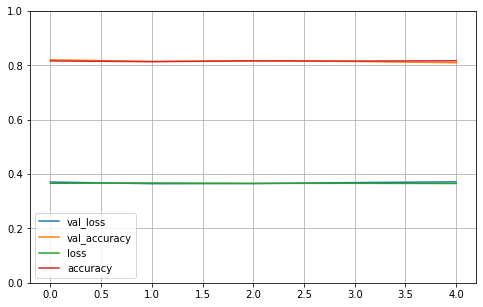

In [16]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [17]:
model.evaluate(X_test,y_test)

15060/15060 [==============================] - 0s 20us/step


[0.3714007297835027, 0.8096281290054321]

In [18]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred= model.predict_classes(X_test) )

0.8096281540504648

# Zad.
Na poniższych danych naucz

* model bez EarlyStopping z 1000 epok
* model z wykorzystaniem EarlyStopping 
    dobierz paametr
    ```python
    patience=
    ```

Zwizualizuj wyniki:

* porównaj krzywe uczenia
* narysuj granice decyzyjne (dane są w 2D)




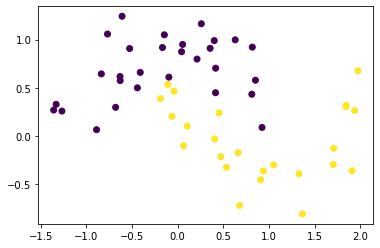

In [19]:
from sklearn.datasets import make_moons
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=5)
# split into train and test
# n_train = 30
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=2)

n_train=53
X_train, X_test = X[:n_train, :], X[n_train:, :]
y_train, y_test = y[:n_train], y[n_train:]

plt.scatter(X_train[:,0],X_train[:,1], c=y_train)
plt.show()

In [25]:
history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 100)               300       
_________________________________________________________________
dense_14 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 11        
Total params: 5,871
Trainable params: 5,871
Non-trainable params: 0
_________________________________________________________________


In [53]:
history2 = History()
model2 = Sequential()
model2.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model2.add(Dense(50,activation="sigmoid"))
model2.add(Dense(10,activation="sigmoid"))
model2.add(Dense(1,activation="sigmoid"))
model2.summary()
model2.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
early_stopping = EarlyStopping(monitor='val_loss', patience=50, mode='min', verbose=1, min_delta=0.00005)
history2 = model2.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=1000, callbacks=[early_stopping])

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 100)               300       
_________________________________________________________________
dense_46 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_47 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 11        
Total params: 5,871
Trainable params: 5,871
Non-trainable params: 0
_________________________________________________________________
Train on 53 samples, validate on 47 samples
Epoch 1/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7156 - accuracy: 0.4528 - val_loss: 0.6887 - val_accuracy: 0.5532
Epoch 2/1000
53/53 [==============================] - 0s 165us/

In [0]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [28]:
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=1000)

Train on 53 samples, validate on 47 samples
Epoch 1/1000
53/53 [==============================] - 0s 3ms/step - loss: 0.7045 - accuracy: 0.5472 - val_loss: 0.7459 - val_accuracy: 0.4468
Epoch 2/1000
53/53 [==============================] - 0s 170us/step - loss: 0.6988 - accuracy: 0.5472 - val_loss: 0.7332 - val_accuracy: 0.4468
Epoch 3/1000
53/53 [==============================] - 0s 165us/step - loss: 0.6942 - accuracy: 0.5472 - val_loss: 0.7233 - val_accuracy: 0.4468
Epoch 4/1000
53/53 [==============================] - 0s 168us/step - loss: 0.6906 - accuracy: 0.5472 - val_loss: 0.7160 - val_accuracy: 0.4468
Epoch 5/1000
53/53 [==============================] - 0s 170us/step - loss: 0.6884 - accuracy: 0.5472 - val_loss: 0.7103 - val_accuracy: 0.4468
Epoch 6/1000
53/53 [==============================] - 0s 150us/step - loss: 0.6880 - accuracy: 0.5472 - val_loss: 0.7056 - val_accuracy: 0.4468
Epoch 7/1000
53/53 [==============================] - 0s 184us/step - loss: 0.6872 - accuracy:

In [0]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


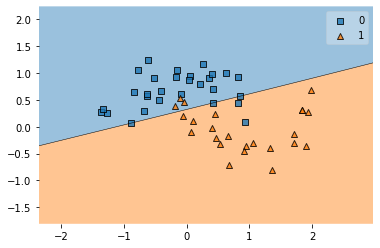

In [41]:
# svm = SVC(C=0.5, kernel='linear')
# svm.fit(X_test, y_test)

plot_decision_regions(X_train, y_train, clf=model)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


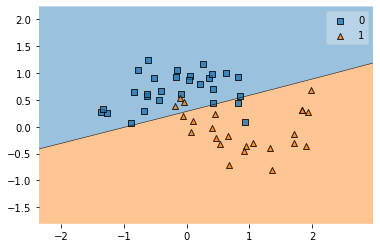

In [54]:
plot_decision_regions(X_train, y_train, clf=model2)